In [1]:
#pip install xgboost pandas scikit-learn matplotlib


In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
import matplotlib.pyplot as plt
from xgboost import plot_importance

In [5]:
%ls qcd-tt-jet-tagging-co-da-s-hep/processed_data/train/features/

ls: qcd-tt-jet-tagging-co-da-s-hep/train/features/: No such file or directory


In [7]:
# Step 1: Load train data
df_features = pd.read_csv("qcd-tt-jet-tagging-co-da-s-hep/processed_data/train/features/cluster_features.csv")
labels = np.load("qcd-tt-jet-tagging-co-da-s-hep/processed_data/train/labels/labels.npy")
ids = np.load("qcd-tt-jet-tagging-co-da-s-hep/processed_data/train/ids/ids.npy")

In [8]:
# Step 2: Load test data
df_features_test = pd.read_csv("qcd-tt-jet-tagging-co-da-s-hep/processed_data/test/features/cluster_features.csv")
ids_test = np.load("qcd-tt-jet-tagging-co-da-s-hep/processed_data/test/ids/ids.npy")

In [9]:
# Step 3: Load valid data
df_features_val = pd.read_csv("qcd-tt-jet-tagging-co-da-s-hep/processed_data/val/features/cluster_features.csv")
labels_val = np.load("qcd-tt-jet-tagging-co-da-s-hep/processed_data/val/labels/labels.npy")
ids_val = np.load("qcd-tt-jet-tagging-co-da-s-hep/processed_data/val/ids/ids.npy")

In [10]:
print (len(df_features))
print (len(labels))
print (len(ids))

3520
3520
3520


In [7]:
print (len(df_features_test))
print (len(ids_test))

1005
1005


In [8]:
print (len(df_features_val))
print (len(ids_val))
print (len(labels_val))

502
502
502


In [9]:
# Convert labels to DataFrame
df_labels = pd.DataFrame(labels, columns=["label"])
df_ids = pd.DataFrame(ids, columns=["id"])

# Concatenate horizontally
df_combined_train = pd.concat([df_features, df_labels, df_ids], axis=1)

# Save to CSV
df_combined_train.to_csv("combo.csv", index=False)


In [10]:
print(df_combined_train.shape) 
print(df_combined_train.keys())
df_combined_train.head()

(3520, 16)
Index(['n_clusters', 'max_cluster_pt', 'mean_cluster_pt', 'std_cluster_pt',
       'max_cluster_size', 'mean_cluster_size', 'std_cluster_size', 'total_pt',
       'max_cluster_eta', 'max_cluster_phi', 'mean_cluster_eta',
       'mean_cluster_phi', 'cluster_pt_ratio', 'cluster_size_ratio', 'label',
       'id'],
      dtype='object')


,n_clusters,max_cluster_pt,mean_cluster_pt,std_cluster_pt,max_cluster_size,mean_cluster_size,std_cluster_size,total_pt,max_cluster_eta,max_cluster_phi,mean_cluster_eta,mean_cluster_phi,cluster_pt_ratio,cluster_size_ratio,label,id
0,13,2.0,0.615318,0.539951,2,2.0,0.0,7.999129,0.5,0.7,0.076923,0.346154,1.470200,1.0,0.0,jet_1426
1,10,2.0,0.777020,0.601157,2,2.0,0.0,7.770204,0.2,0.5,0.100000,0.230000,1.430785,1.0,0.0,jet_2531
2,4,2.0,0.972718,0.606990,2,2.0,0.0,3.890871,0.1,0.1,0.050000,0.050000,2.557882,1.0,0.0,jet_436
3,14,2.0,0.746367,0.485636,2,2.0,0.0,10.449135,0.5,0.5,0.185714,0.285714,1.624096,1.0,1.0,jet_4576
4,6,2.0,0.575760,0.639069,2,2.0,0.0,3.454561,0.1,0.1,0.050000,0.066667,4.988196,1.0,0.0,jet_912


In [11]:
# Validation
df_labels_val = pd.DataFrame(labels_val, columns=["label"])
df_ids_val = pd.DataFrame(ids_val, columns=["id"])
df_combined_val = pd.concat([df_features_val, df_labels_val, df_ids_val], axis=1)


In [12]:
print(df_combined_val.shape) 
print(df_combined_val.keys())
df_combined_val.head()

(502, 16)
Index(['n_clusters', 'max_cluster_pt', 'mean_cluster_pt', 'std_cluster_pt',
       'max_cluster_size', 'mean_cluster_size', 'std_cluster_size', 'total_pt',
       'max_cluster_eta', 'max_cluster_phi', 'mean_cluster_eta',
       'mean_cluster_phi', 'cluster_pt_ratio', 'cluster_size_ratio', 'label',
       'id'],
      dtype='object')


,n_clusters,max_cluster_pt,mean_cluster_pt,std_cluster_pt,max_cluster_size,mean_cluster_size,std_cluster_size,total_pt,max_cluster_eta,max_cluster_phi,mean_cluster_eta,mean_cluster_phi,cluster_pt_ratio,cluster_size_ratio,label,id
0,5,2.0,0.642573,0.679402,2,2.0,0.0,3.212863,0.1,0.8,0.040000,0.320000,6.072678,1.0,1.0,jet_3674
1,6,2.0,0.664808,0.609032,2,2.0,0.0,3.988846,0.1,0.8,0.050000,0.283333,3.613901,1.0,1.0,jet_3976
2,18,2.0,0.618785,0.515798,2,2.0,0.0,11.138124,0.5,0.6,0.116667,0.283333,1.347503,1.0,0.0,jet_150
3,4,2.0,0.875803,0.667377,2,2.0,0.0,3.503212,0.1,0.1,0.025000,0.075000,2.721974,1.0,0.0,jet_1451
4,12,2.0,0.632585,0.499172,2,2.0,0.0,7.591024,0.3,0.8,0.116667,0.475000,1.636542,1.0,1.0,jet_4430


In [11]:
# Convert labels to DataFrame
df_labels = pd.DataFrame(labels, columns=["label"])
df_ids = pd.DataFrame(ids, columns=["id"])

# Concatenate horizontally
df_combined_train = pd.concat([df_features, df_labels, df_ids], axis=1)

# Save to CSV
df_combined_train.to_csv("combo.csv", index=False)
# Convert labels to DataFrame
#df_labels = pd.DataFrame(labels, columns=["label"])
df_ids = pd.DataFrame(ids_test, columns=["id"])

# Concatenate horizontally
df_combined_test = pd.concat([df_features_test, df_ids], axis=1)

# Save to CSV
df_combined_test.to_csv("combo_test.csv", index=False)
# Convert labels to DataFrame
df_labels = pd.DataFrame(labels_val, columns=["label"])
df_ids = pd.DataFrame(ids_val, columns=["id"])

# Concatenate horizontally
df_combined_val = pd.concat([df_features_val, df_labels, df_ids], axis=1)

# Save to CSV
df_combined_val.to_csv("combo_val.csv", index=False)

/var/folders/nr/kljd3xx106109hjm5jlktf280000gn/T/ipykernel_95114/3611507604.py:81: UserWarning: [21:38:02] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/c_api/c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  bdt.save_model("bdt_Proton.model")


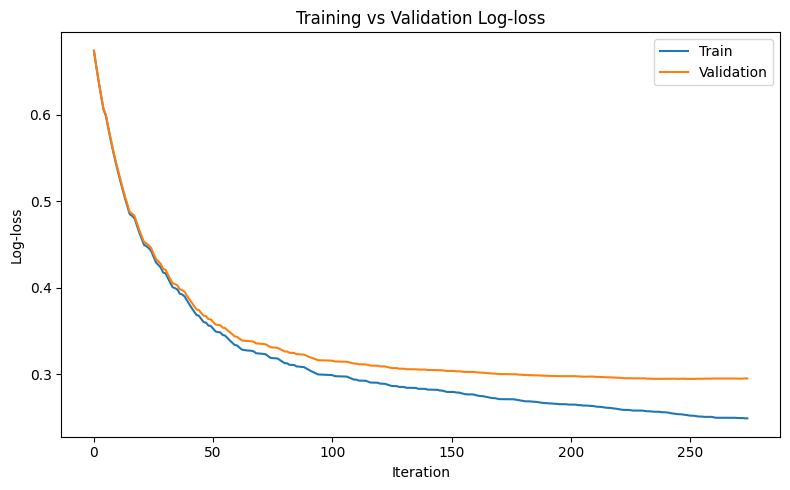

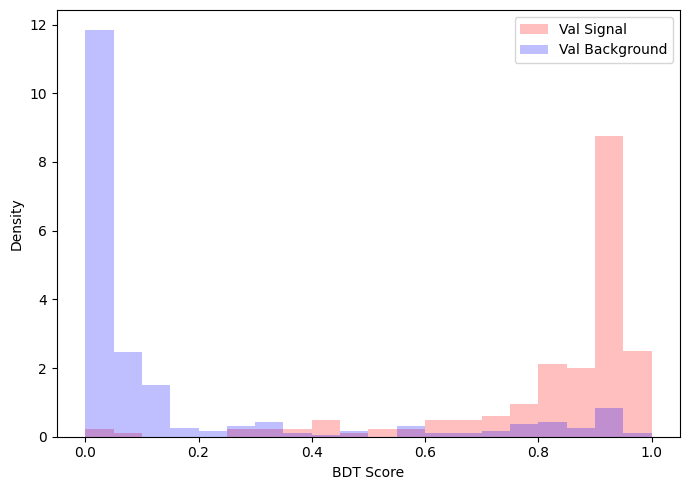

In [106]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
import matplotlib.pyplot as plt

# -------------------------------
# Load combined data
# -------------------------------
df_train = pd.read_csv("combo.csv")        # Train: features + label + id
df_val = pd.read_csv("combo_val.csv")      # Validation: features + label + id
df_test = pd.read_csv("combo_test.csv")    # Test: features + id only

# -------------------------------
# Features to use
# -------------------------------
bdt_vars = [
    "cluster_pt_ratio",
    "mean_cluster_eta",
    "mean_cluster_phi",
    "std_cluster_pt",
    "n_clusters"
]

# -------------------------------
# Extract labels
# -------------------------------
labels_train = df_train["label"]
labels_val = df_val["label"]

# -------------------------------
# Create DMatrix objects
# -------------------------------
xgb_train = xgb.DMatrix(df_train[bdt_vars], label=labels_train)
xgb_val = xgb.DMatrix(df_val[bdt_vars], label=labels_val)
xgb_test = xgb.DMatrix(df_test[bdt_vars])

# -------------------------------
# Compute class weight (optional)
# -------------------------------
scale_weight = len(df_train[df_train["label"] == 0]) / len(df_train[df_train["label"] == 1])

# -------------------------------
# XGBoost training parameters
# -------------------------------
params = {
    'booster': 'dart',
    'max_depth': 5,
    'eta': 0.03,
    'gamma': 1,
    'objective': 'binary:logistic',
    'tree_method': 'hist',
    'rate_drop': 0.1,
    'skip_drop': 0.5,
    'scale_pos_weight': scale_weight,
    'nthread': 50,
    'eval_metric': 'logloss'
}

# -------------------------------
# Train model with validation
# -------------------------------
num_rounds = 500
watchlist = [(xgb_train, "train"), (xgb_val, "val")]
evals_result = {}

bdt = xgb.train(
    params,
    xgb_train,
    num_boost_round=num_rounds,
    evals=watchlist,
    evals_result=evals_result,
    early_stopping_rounds=25,
    verbose_eval=False
)

# -------------------------------
# Save model
# -------------------------------
pickle.dump(bdt, open("protonBDT.pickle.dat", "wb"))
bdt.save_model("bdt_Proton.model")
bdt.dump_model("bdt_dump_Proton.txt")

# -------------------------------
# Plot training vs validation logloss
# -------------------------------
plt.figure(figsize=(8, 5))
plt.plot(evals_result["train"]["logloss"], label="Train")
plt.plot(evals_result["val"]["logloss"], label="Validation")
plt.xlabel("Iteration")
plt.ylabel("Log-loss")
plt.legend()
plt.title("Training vs Validation Log-loss")
plt.tight_layout()
plt.show()

# -------------------------------
# Evaluate performance on validation
# -------------------------------
y_val_pred = bdt.predict(xgb_val)

# Example: histogram of predicted BDT scores
plt.figure(figsize=(7, 5))
plt.hist(y_val_pred[labels_val == 1], bins=20, range=[0, 1], alpha=0.25, label="Val Signal", color="red", density=True)
plt.hist(y_val_pred[labels_val == 0], bins=20, range=[0, 1], alpha=0.25, label="Val Background", color="blue", density=True)
plt.xlabel("BDT Score")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# Apply to test data (no labels)
# -------------------------------
y_test_pred = bdt.predict(xgb_test)
df_test["bdt_score"] = y_test_pred

# Save predictions
df_test[["id", "bdt_score"]].to_csv("bdt_predictions.csv", index=False)


In [107]:
df_test[["id", "bdt_score"]].rename(columns={"bdt_score": "label"}).to_csv("submission.csv", index=False)

In [108]:
from sklearn.metrics import roc_auc_score
print("Validation AUC:", roc_auc_score(labels_val, y_val_pred))

Validation AUC: 0.9405440943902482


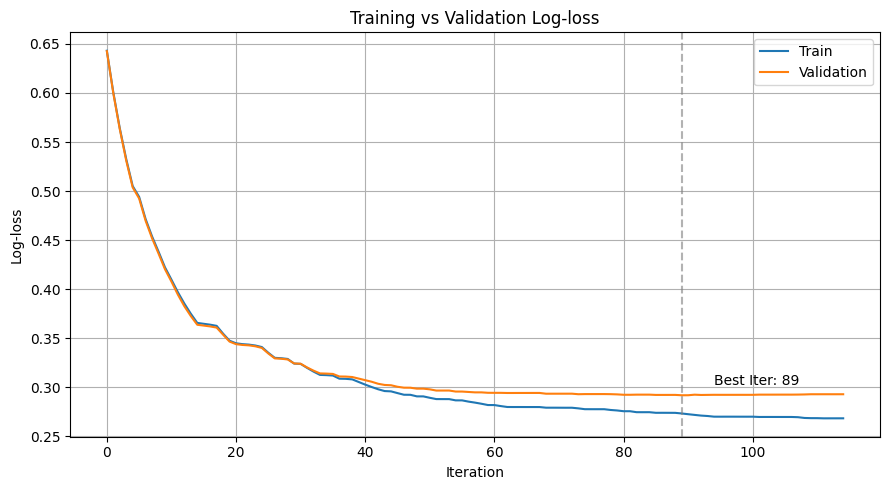

In [64]:
plt.figure(figsize=(9, 5))
train_loss = evals_result["train"]["logloss"]
val_loss = evals_result["val"]["logloss"]
plt.plot(train_loss, label="Train", color="tab:blue")
plt.plot(val_loss, label="Validation", color="tab:orange")

best_iter = np.argmin(val_loss)
best_loss = val_loss[best_iter]
plt.axvline(best_iter, color="gray", linestyle="--", alpha=0.6)
plt.text(best_iter + 5, best_loss + 0.01, f"Best Iter: {best_iter}", fontsize=10)

plt.xlabel("Iteration")
plt.ylabel("Log-loss")
plt.title("Training vs Validation Log-loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

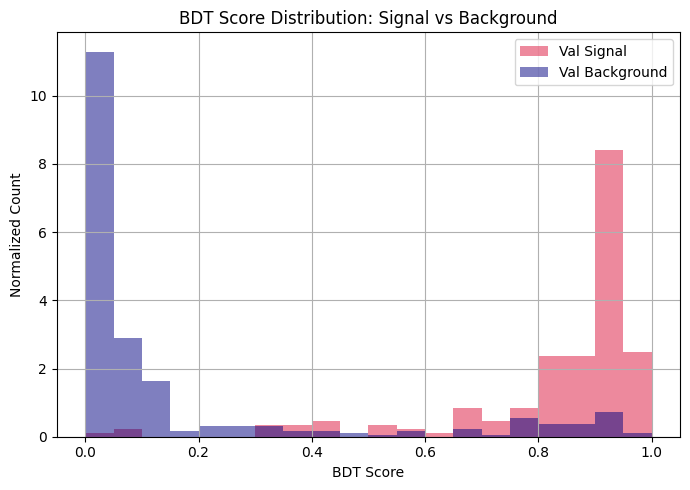

In [56]:
plt.figure(figsize=(7, 5))
plt.hist(y_val_pred[labels_val == 1], bins=20, range=[0, 1], 
         alpha=0.5, label="Val Signal", color="crimson", density=True, histtype='stepfilled')
plt.hist(y_val_pred[labels_val == 0], bins=20, range=[0, 1], 
         alpha=0.5, label="Val Background", color="navy", density=True, histtype='stepfilled')
plt.xlabel("BDT Score")
plt.ylabel("Normalized Count")
plt.title("BDT Score Distribution: Signal vs Background")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

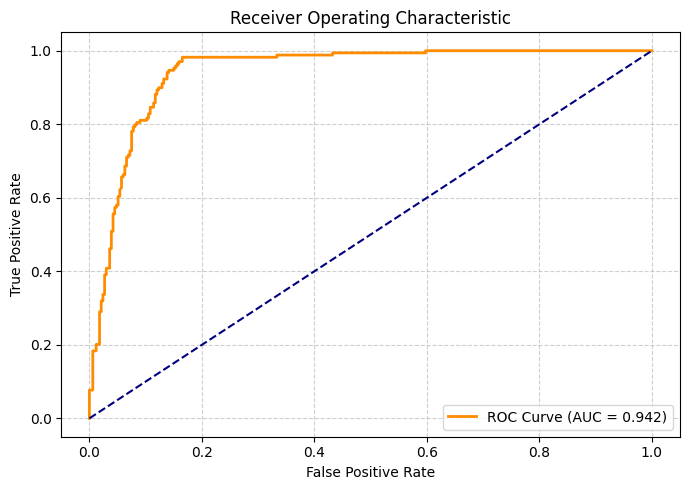

In [57]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(labels_val, y_val_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=1.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

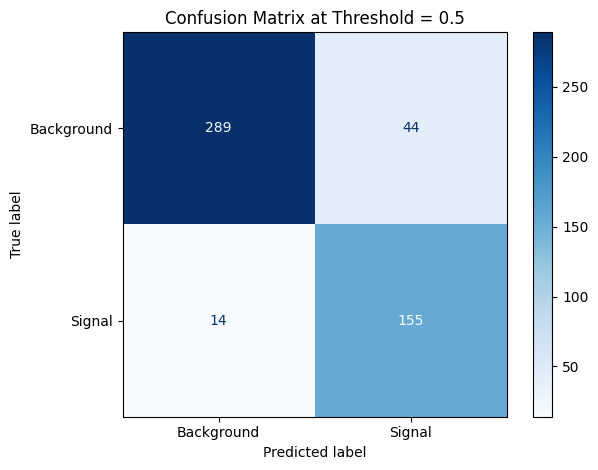

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_val_label = (y_val_pred > 0.5).astype(int)
cm = confusion_matrix(labels_val, y_val_label)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Background", "Signal"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix at Threshold = 0.5")
plt.grid(False)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pickle

# -------------------------------
# Load combined data
# -------------------------------
df_train = pd.read_csv("combo.csv")        # Train: features + label + id
df_val = pd.read_csv("combo_val.csv")      # Validation: features + label + id
df_test = pd.read_csv("combo_test.csv")    # Test: features + id only

# -------------------------------
# Features to use
# -------------------------------
bdt_vars = [
    "cluster_pt_ratio",
    "mean_cluster_eta",
    "mean_cluster_phi",
    "std_cluster_pt",
    "n_clusters"
]

X_train = df_train[bdt_vars]
y_train = df_train["label"]
X_val = df_val[bdt_vars]
y_val = df_val["label"]
X_test = df_test[bdt_vars]

# -------------------------------
# Class Weight
# -------------------------------
scale_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

# -------------------------------
# Base XGBoost model with optimized parameters
# -------------------------------
xgb_clf = xgb.XGBClassifier(
    booster='dart',
    objective='binary:logistic',
    max_depth=4,
    eta=0.03,
    gamma=1,
    tree_method='hist',
    rate_drop=0.1,
    skip_drop=0.5,
    scale_pos_weight=scale_weight,
    eval_metric='logloss',
    n_estimators=300,
    use_label_encoder=False,
    n_jobs=-1
)

# -------------------------------
# Meta-learner for stacking
# -------------------------------
stack = StackingClassifier(
    estimators=[('xgb', xgb_clf)],
    final_estimator=LogisticRegression(),
    passthrough=True,
    cv=5
)

# -------------------------------
# Fit model
# -------------------------------
stack.fit(X_train, y_train)

# -------------------------------
# ROC and AUC
# -------------------------------
y_val_pred_prob = stack.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_val_pred_prob)
auc_score = roc_auc_score(y_val, y_val_pred_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------
# Confusion Matrix at threshold 0.5
# -------------------------------
y_val_pred_label = (y_val_pred_prob > 0.5).astype(int)
cm = confusion_matrix(y_val, y_val_pred_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

# -------------------------------
# Feature importance (from XGBoost base)
# -------------------------------
xgb_clf.fit(X_train, y_train)
xgb.plot_importance(xgb_clf, importance_type='gain')
plt.title("Feature Importance (Gain)")
plt.tight_layout()
plt.show()

# -------------------------------
# Predict on test set and export
# -------------------------------
y_test_pred = stack.predict_proba(X_test)[:, 1]
df_test["label"] = y_test_pred
df_test[["id", "label"]].to_csv("bdt_predictions.csv", index=False)

/Users/adilhussain/anaconda3/envs/fixed_env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:38:50] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/adilhussain/anaconda3/envs/fixed_env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:38:56] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/adilhussain/anaconda3/envs/fixed_env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [21:39:03] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1748292887431/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
